In [28]:
## Import the Classifiers.
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KDTree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import QuantileTransformer
import seaborn as sns


data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/spotify/data.csv')

In [ ]:
##DATA FILTERING AND CHECKING
data[data.artists == 'Queen'].head(20)
#data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year


In [ ]:
bins = [0, 85, 101]
#labels = ['Nah Homie', 'Yah Boi']
labels = ['0', '1']
data["pop_or_not"] = pd.cut(data['popularity'], bins = bins, labels = labels, right = False)
data[data.popularity >=99].head()
data.pop_or_not.value_counts()

0    169744
1       165
Name: pop_or_not, dtype: int64

In [ ]:
data_numeric = data[['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']]

x_array = data_numeric.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_array)
data_norm = pd.DataFrame(x_scaled)

X = data_norm
y = data['popularity']

## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsClassifier(n_neighbors=120, weights = 'uniform')
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.17173595743679082

In [31]:
data_numeric = data[['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'popularity']]
#data_numeric = data[['danceability', 'energy', 'instrumentalness', 'speechiness', 'tempo']]


x_array = data_numeric.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_array)
data_norm = pd.DataFrame(x_scaled)

X = data_norm
y = data['popularity']

## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y)

knn2 = KNeighborsRegressor(n_neighbors=120, weights = 'distance')
#knn2.fit(X_train, y_train)
#knn2.score(X_test,y_test)

r2 = RandomForestRegressor(n_estimators= 10)
votingRegressor = VotingRegressor([('rf', r2), ('knn', knn2)])
votingRegressor.fit(X_train, y_train)
votingRegressor.score(X_test,y_test)

0.9853190174810947

In [ ]:
testRecords = data_numeric[data.popularity == 75]
testRecords.head()
knn.predict(testRecords)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
preds = votingRegressor.predict(X_test)
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test,preds)))

Root Mean squared error: 2.61


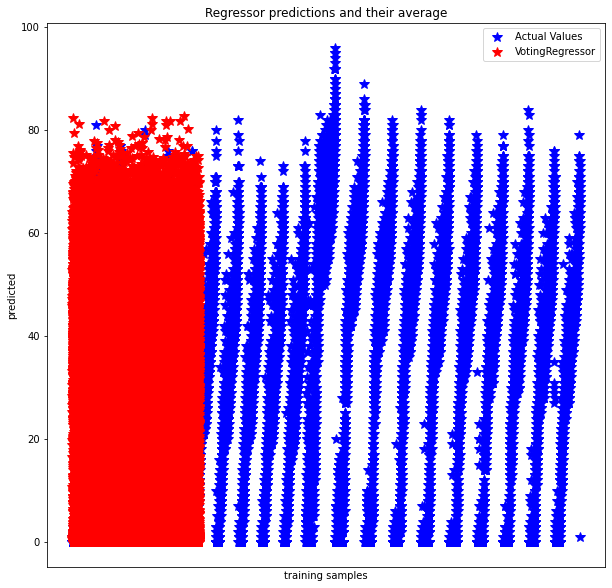

In [34]:
plt.figure(figsize=(10,10))
plt.plot(y_test, 'b*', ms=10, label='Actual Values')
plt.plot(preds, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


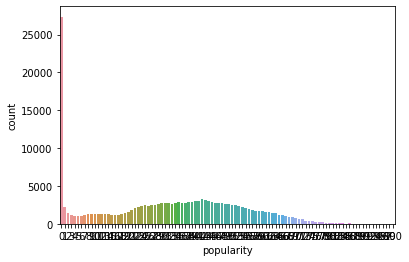

In [35]:
rng = np.random.RandomState(0)
X = data_numeric
qt = QuantileTransformer(n_quantiles=10, random_state=0)
qt.fit_transform(X)
sns.countplot(X.popularity)

In [73]:
data.sort_values('popularity').tail(30)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87971,0.00285,['The Weeknd'],0.667,237520,0.719,1,7szuecWAPwGoV1e5vGu8tl,0.000081,7,0.0736,-5.371,0,In Your Eyes,91,2020-03-20,0.0346,100.021,0.717,2020
87945,0.20700,['Lil Mosey'],0.774,162547,0.554,1,6wJYhPfqk3KGhHRG76WzOh,0.000000,0,0.1320,-7.909,1,Blueberry Faygo,92,2020-02-07,0.0383,99.034,0.349,2020
87970,0.02100,['Bad Bunny'],0.860,172127,0.758,0,0SqqAgdovOE24BzxIClpjw,0.000065,11,0.3440,-5.160,1,Yo Perreo Sola,92,2020-02-28,0.0695,97.014,0.453,2020
87969,0.12700,['Doja Cat'],0.707,134240,0.955,0,78qd8dvwea0Gosb6Fe6j3k,0.000000,10,0.2020,-4.593,0,Boss Bitch,92,2020-01-23,0.2220,125.989,0.575,2020
87977,0.01030,"['Bad Bunny', 'Jowell & Randy', 'Nengo Flow']",0.607,295177,0.829,1,2DEZmgHKAvm41k4J3R2E9Y,0.000000,2,0.1070,-4.074,1,Safaera,92,2020-02-28,0.3790,96.172,0.685,2020
87947,0.01600,"['Megan Thee Stallion', 'Beyoncé']",0.822,242001,0.743,1,5v4GgrXPMghOnBBLmveLac,0.000000,10,0.1270,-4.772,0,Savage Remix (feat. Beyoncé),92,2020-04-29,0.2800,84.459,0.636,2020
87741,0.12300,['Trevor Daniel'],0.784,159382,0.430,0,4TnjEaWOeW0eKTKIEvJyCa,0.000000,10,0.0887,-8.756,0,Falling,92,2018-10-05,0.0364,127.087,0.236,2018
87742,0.00513,['Travis Scott'],0.834,312820,0.730,1,2xLMifQCjDGFmkHkpNLD9h,0.000000,8,0.1240,-3.714,1,SICKO MODE,92,2018-08-03,0.2220,155.008,0.446,2018
87890,0.22300,"['Topic', 'A7S']",0.789,166794,0.720,0,3H7ihDc1dqLriiWXwsc2po,0.000000,8,0.1290,-5.652,0,Breaking Me,92,2019-12-19,0.2180,122.031,0.664,2019
87909,0.29500,"['KAROL G', 'Nicki Minaj']",0.803,200960,0.715,0,7k4t7uLgtOxPwTpFmtJNTY,0.000134,2,0.0574,-3.280,1,Tusa,92,2019-11-07,0.2980,101.085,0.574,2019
